<a href="https://colab.research.google.com/github/krakowiakpawel9/decision_tree_course/blob/master/09_housing_boston_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
raw_data = load_boston()
raw_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [19]:
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
data = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
target = pd.DataFrame(raw_data.target)

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [25]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
plot = ['AGE', 'DIS', 'INDUS', 'RM']

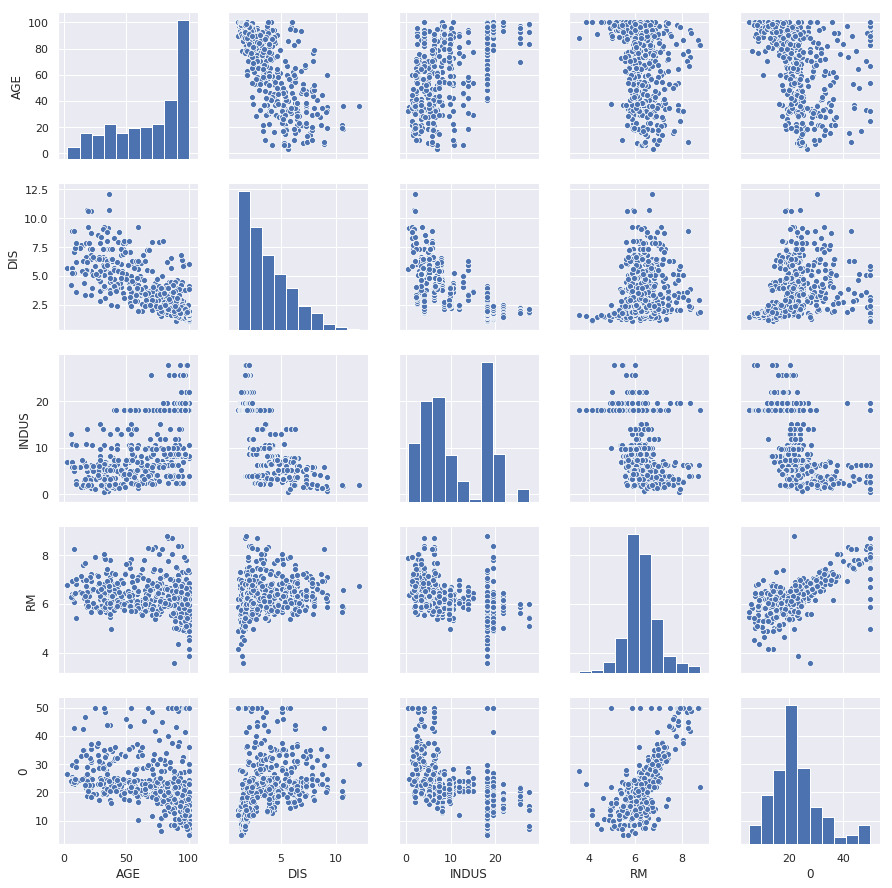

In [91]:
anal = data[plot]
anal = pd.concat([anal, target], axis=1)
sns.pairplot(anal)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [66]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [67]:
reg.score(X_test, y_test)

0.7216054515481589

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [3, 4, 5, 10, 15]}]

gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_leaf': [3, 4, 5, 10, 15]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [87]:
gs.score(X_test, y_test)

0.7266894259089949

In [0]:
model = gs.best_estimator_

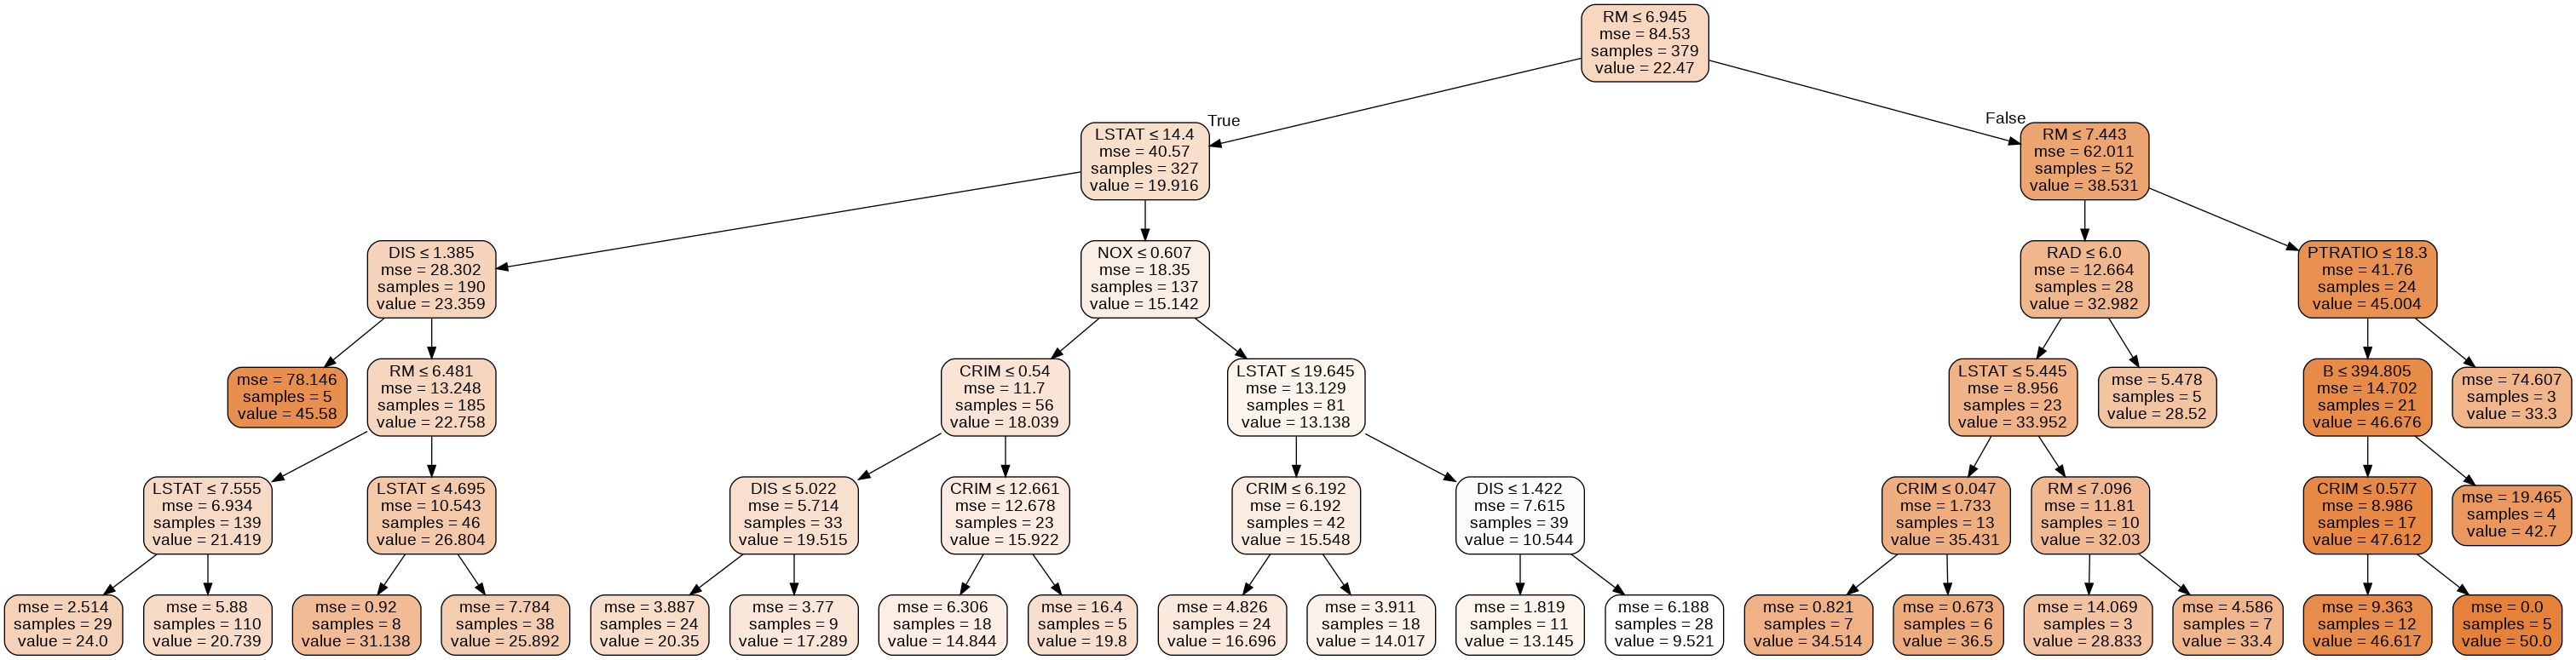

In [89]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())